In [67]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [68]:
# Import the dataset
df = pd.read_csv('BankChurners.csv')

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [69]:
df.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'Naive_Bayes_Classifier1', 
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'Naive_Bayes_Classifier2',
                   'Customer_Age': 'Age'}, inplace=True)

In [70]:
# Drop Unneccessary Columns
df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier1', 'Naive_Bayes_Classifier2'], axis=1, inplace=True)

In [71]:
df.head()

,Attrition_Flag,Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [72]:
# How many rows and columns?
df.shape

(10127, 20)

In [73]:
# Names of Columns
list(df.columns)

['Attrition_Flag',
 'Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [74]:
# Datatypes of columns
df.dtypes

Attrition_Flag               object
Age                           int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [75]:
# Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


## Check the target variable

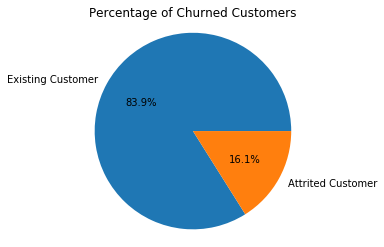

In [76]:
target = df['Attrition_Flag'].value_counts()

fig1, ax1 = plt.subplots()

ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title('Percentage of Churned Customers')
plt.show()

We have imbalanced data since less than 20% of all customers churn. Upsampling will be required to receive better results.

### Correlation of features with the target variable (i.e. Attrition Flag)

In [77]:
df2 = df.copy()

In [78]:
# Encode Target Variable
df2.Attrition_Flag.replace(('Attrited Customer', 'Existing Customer'), (1, 0), inplace=True)

In [79]:
# Create dummy variables for categorical features
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,Attrition_Flag,Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,1,0,0,0,1,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,0,0,0,0,1,0,1,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,1,0,0,1,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0,0,0,0,1,0,1,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,1,0,0,0,1,0,0,0


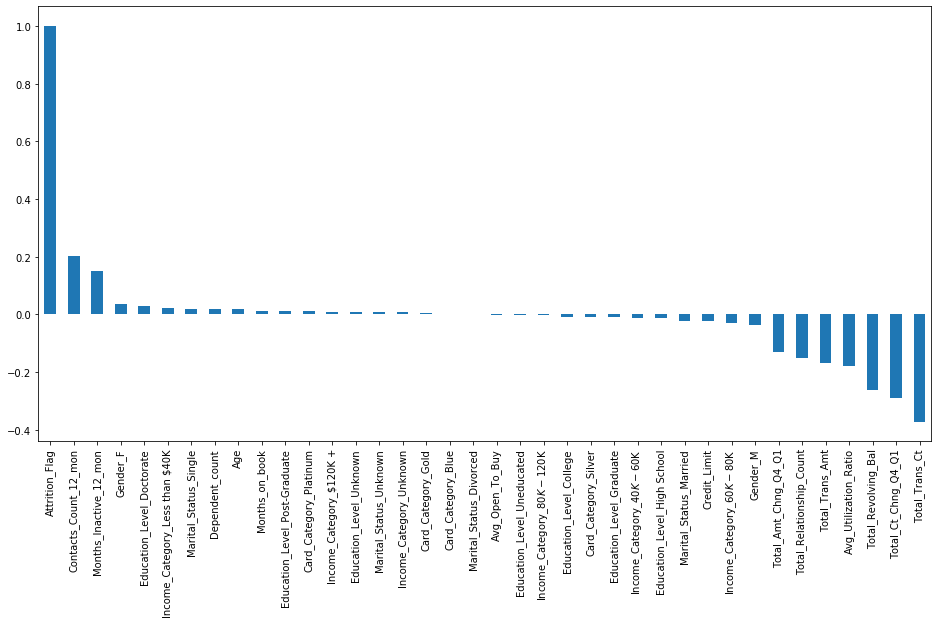

In [80]:
# Plot correlation
plt.figure(figsize=(16,8))
df_dummies.corr()['Attrition_Flag'].sort_values(ascending = False).plot(kind='bar')
plt.show()

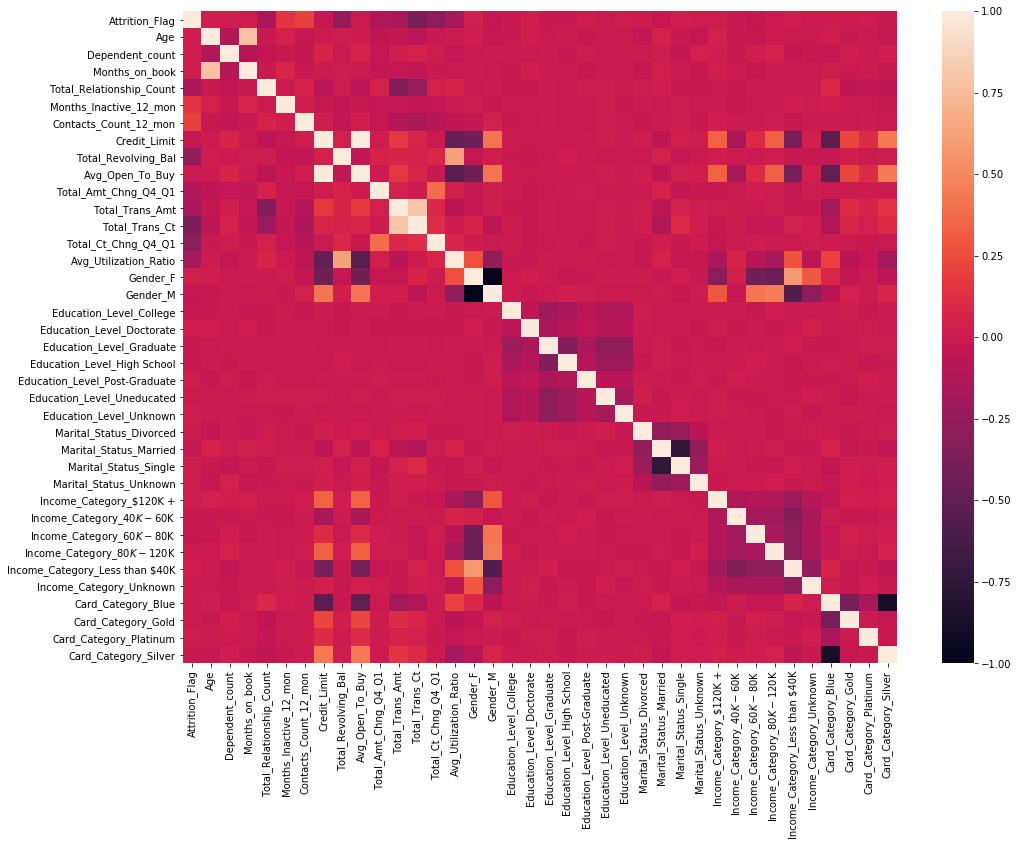

In [81]:
# Heat map
plt.figure(figsize=(16,12))
sns.heatmap(df_dummies.corr());
plt.show()

## Explore Numerical Columns

In [82]:
#List of Numerical Columns
numerical_cols = list(df.select_dtypes(exclude=['object']))

numerical_cols

['Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [83]:
df_num = df.select_dtypes(exclude=['object'])

df_num.head()

,Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Column: Age


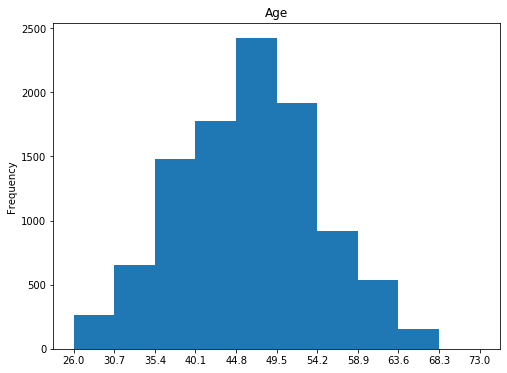

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
60    127
33    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
73      1
70      1
Name: Age, dtype: int64

46.0



Column: Dependent_count


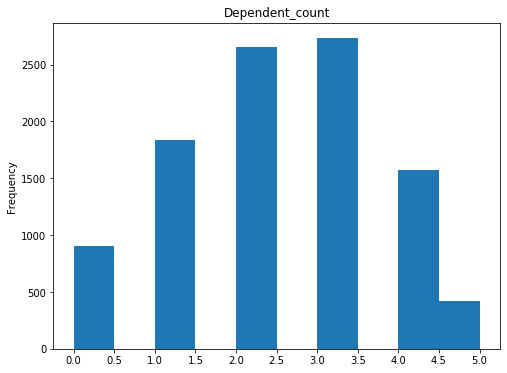

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

2.0



Column: Months_on_book


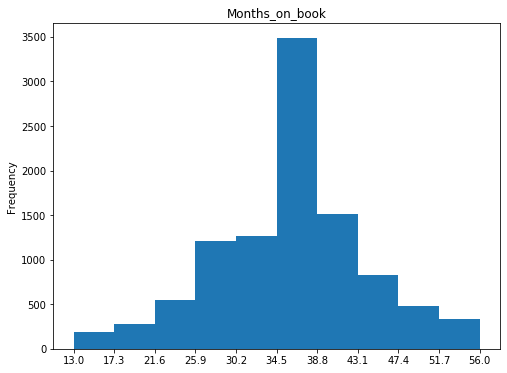

36    2463
37     358
34     353
38     347
39     341
40     333
31     318
35     317
33     305
30     300
41     297
32     289
28     275
43     273
42     271
29     241
44     230
45     227
27     206
46     197
26     186
47     171
25     165
48     162
24     160
49     141
23     116
22     105
56     103
50      96
21      83
51      80
53      78
20      74
13      70
19      63
52      62
18      58
54      53
55      42
17      39
15      34
16      29
14      16
Name: Months_on_book, dtype: int64

36.0



Column: Total_Relationship_Count


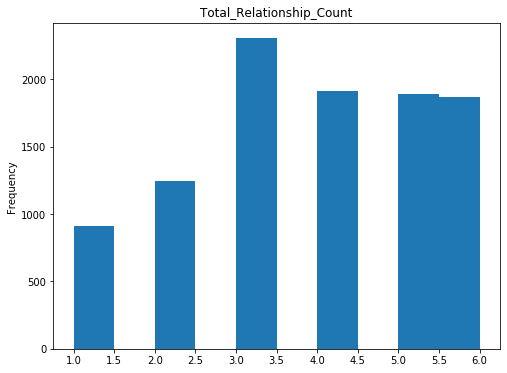

3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64

4.0



Column: Months_Inactive_12_mon


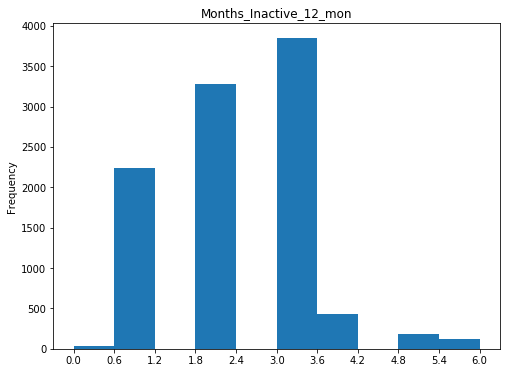

3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64

2.0



Column: Contacts_Count_12_mon


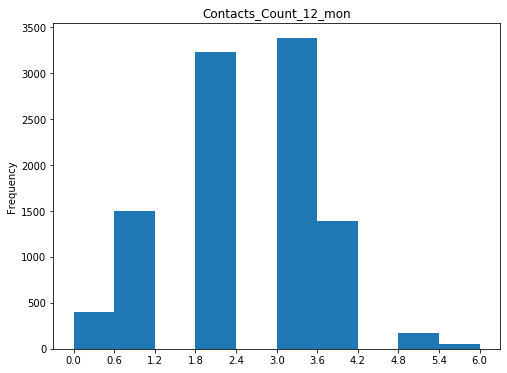

3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64

2.0



Column: Credit_Limit


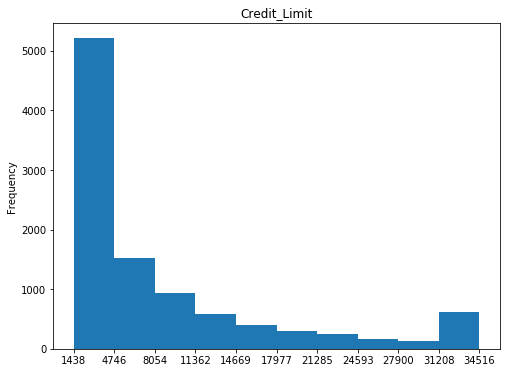

34516.0    508
1438.3     507
15987.0     18
9959.0      18
23981.0     12
          ... 
3891.0       1
19354.0      1
34427.0      1
14527.0      1
8206.0       1
Name: Credit_Limit, Length: 6205, dtype: int64

4549.0



Column: Total_Revolving_Bal


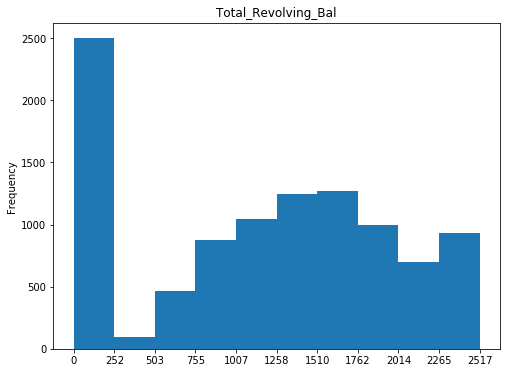

0       2470
2517     508
1965      12
1480      12
1720      11
        ... 
1401       1
2293       1
2172       1
2040       1
204        1
Name: Total_Revolving_Bal, Length: 1974, dtype: int64

1276.0



Column: Avg_Open_To_Buy


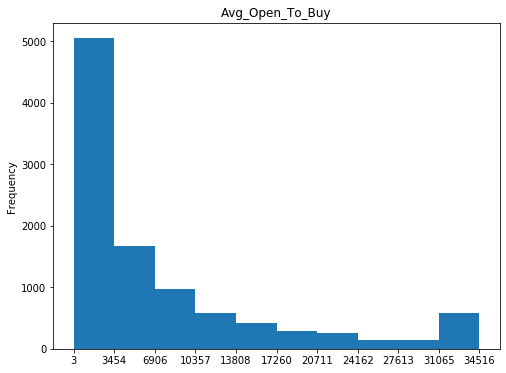

1438.3     324
34516.0     98
31999.0     26
787.0        8
953.0        7
          ... 
2214.0       1
4458.0       1
8013.0       1
33398.0      1
4117.0       1
Name: Avg_Open_To_Buy, Length: 6813, dtype: int64

3474.0



Column: Total_Amt_Chng_Q4_Q1


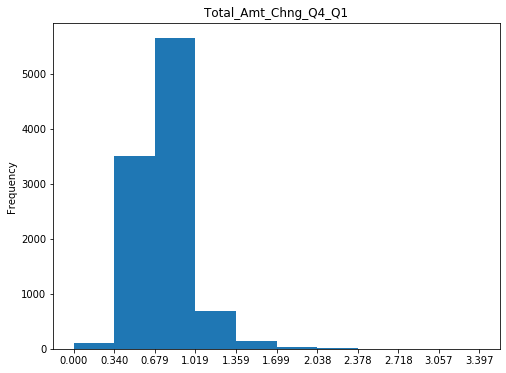

0.791    36
0.743    34
0.712    34
0.735    33
0.718    33
         ..
0.330     1
1.252     1
2.271     1
0.175     1
1.750     1
Name: Total_Amt_Chng_Q4_Q1, Length: 1158, dtype: int64

0.736



Column: Total_Trans_Amt


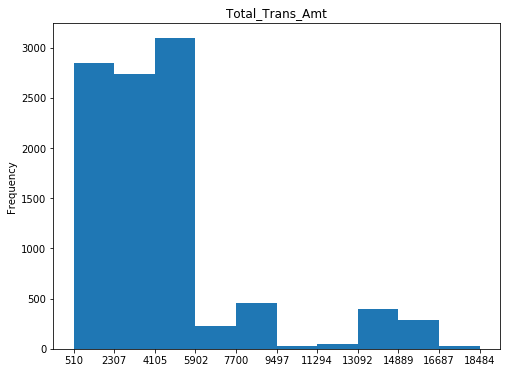

4253     11
4509     11
2229     10
4518     10
4869      9
         ..
1810      1
8257      1
14402     1
2174      1
10294     1
Name: Total_Trans_Amt, Length: 5033, dtype: int64

3899.0



Column: Total_Trans_Ct


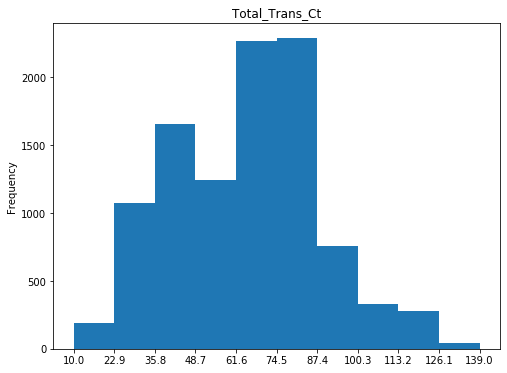

81     208
75     203
71     203
82     202
69     202
      ... 
11       2
138      1
139      1
132      1
134      1
Name: Total_Trans_Ct, Length: 126, dtype: int64

67.0



Column: Total_Ct_Chng_Q4_Q1


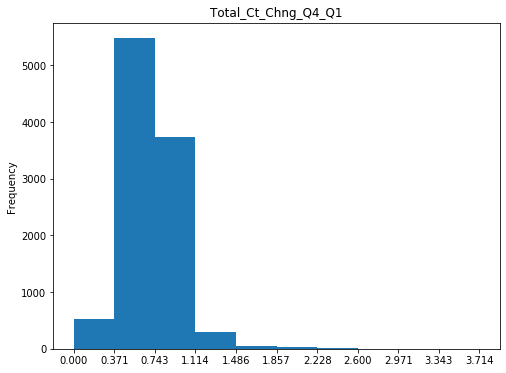

0.667    171
1.000    166
0.500    161
0.750    156
0.600    113
        ... 
1.476      1
0.119      1
1.161      1
1.093      1
1.533      1
Name: Total_Ct_Chng_Q4_Q1, Length: 830, dtype: int64

0.7020000000000001



Column: Avg_Utilization_Ratio


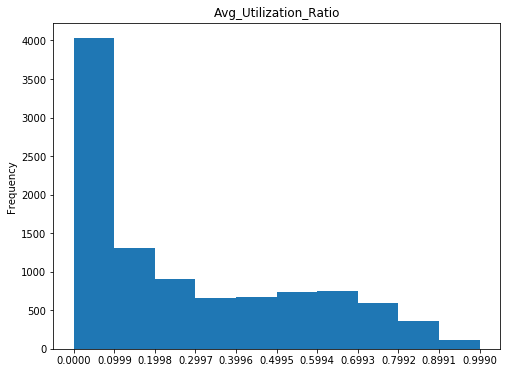

0.000    2470
0.073      44
0.057      33
0.048      32
0.060      30
         ... 
0.929       1
0.874       1
0.995       1
0.011       1
0.985       1
Name: Avg_Utilization_Ratio, Length: 964, dtype: int64

0.17600000000000002

In [84]:
for col in df_num.columns:
    
    print('Column:', col)
    
    count, bin_edges = np.histogram(df_num[col])
    
    plt.figure(figsize=(8,6))
    df_num[col].plot(kind='hist', xticks=bin_edges)
    plt.title(col)
    plt.show();
    
    display(df_num[col].value_counts())
    display(df_num[col].median())
    
    print('\n')

## Transform Continuous Numerical Features  for Better Model Performance

### Credit Limit

In [85]:
# Calculate First and Third Quartile
#first_quartile = df['Credit_Limit'].describe()['25%']
#third_quartile = df['Credit_Limit'].describe()['75%']

# Interquartile Range
#iqr = third_quartile - first_quartile

# Remove outliers
# df = df[(df['Credit_Limit'] > (first_quartile - 1.5 * iqr)) &
          #(df['Credit_Limit'] < (third_quartile + 1.5 * iqr))]

In [86]:
# Check new min and max for Credit Limit Column
df['Credit_Limit'].describe()

count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

In [87]:
df['Credit_Limit'].skew()

1.666725807993647

In [88]:
# Log Transformation
df['Credit_Limit_log'] = np.log((1 + df['Credit_Limit']))

# Skew after transformation
df['Credit_Limit_log'].skew()

0.4573030114679005

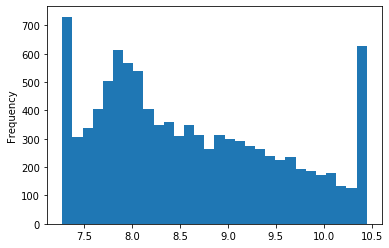

In [89]:
df['Credit_Limit_log'].plot(kind='hist', bins=30);

### Average Open to Buy

In [90]:
# Check skew
print(df['Avg_Open_To_Buy'].skew())

1.6616965459311595


In [91]:
# Log Transformation
df['Avg_Open_To_Buy_Log'] = np.log((1 + df['Avg_Open_To_Buy']))

# Skew after transformation
df['Avg_Open_To_Buy_Log'].skew()

-0.09529846342015706

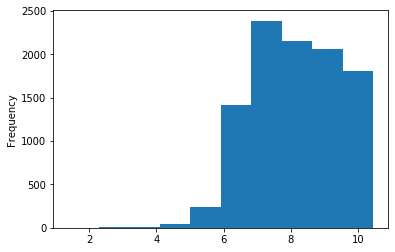

In [92]:
df['Avg_Open_To_Buy_Log'].plot(kind='hist');

### Total Amount Change Q4 to Q1 

In [93]:
# Check skew
print(df['Total_Amt_Chng_Q4_Q1'].skew())

1.7320634114286024


In [94]:
# Log Transformation
df['Total_Amt_Chng_Q4_Q1_Log'] = np.log((1 + df['Total_Amt_Chng_Q4_Q1']))

# Skew after transformation
df['Total_Amt_Chng_Q4_Q1_Log'].skew()

0.6484403480125297

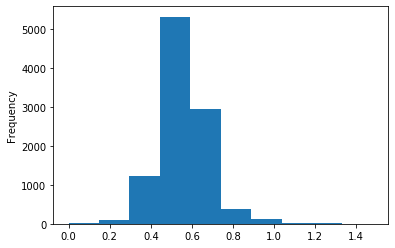

In [95]:
df['Total_Amt_Chng_Q4_Q1_Log'].plot(kind='hist');

### Total Transaction Amount

In [96]:
# Check skew
print(df['Total_Trans_Amt'].skew())

2.0410034025756936


In [97]:
# Log Transformation
df['Total_Trans_Amt_Log'] = np.log((1 + df['Total_Trans_Amt']))

# Skew after transformation
df['Total_Trans_Amt_Log'].skew()

0.26277956391290064

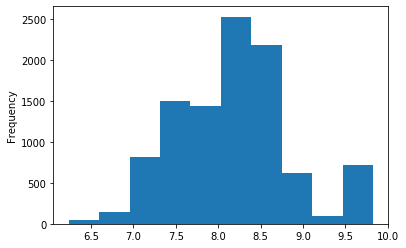

In [98]:
df['Total_Trans_Amt_Log'].plot(kind='hist');

### Totat Count Change Q4 to Q1

In [99]:
# Check Skew
print(df['Total_Ct_Chng_Q4_Q1'].skew())

2.0640305679077477


In [100]:
# Log Transformation
df['Total_Ct_Chng_Q4_Q1_Log'] = np.log((1 + df['Total_Ct_Chng_Q4_Q1']))

# Check new skew
df['Total_Ct_Chng_Q4_Q1_Log'].skew()

0.5101717316864729

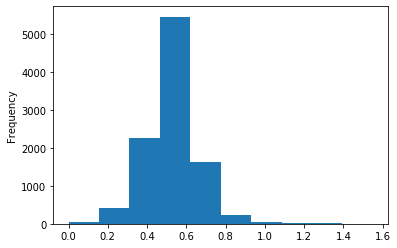

In [101]:
df['Total_Ct_Chng_Q4_Q1_Log'].plot(kind='hist');

In [102]:
# Drop old (non-transformed) columns
df.drop(['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1'], axis=1, inplace=True)

In [103]:
list(df.columns)

['Attrition_Flag',
 'Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Total_Trans_Ct',
 'Avg_Utilization_Ratio',
 'Credit_Limit_log',
 'Avg_Open_To_Buy_Log',
 'Total_Amt_Chng_Q4_Q1_Log',
 'Total_Trans_Amt_Log',
 'Total_Ct_Chng_Q4_Q1_Log']

## Explore Categorical Variables

In [104]:
df_cat = df.select_dtypes(include='object')

In [105]:
df_cat.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


In [106]:
df_cat['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [107]:
for i in df_cat.columns:
    print(i)
    print(df_cat[i].nunique())
    print(df_cat[i].unique())
    print('---'*25)

Attrition_Flag
2
['Existing Customer' 'Attrited Customer']
---------------------------------------------------------------------------
Gender
2
['M' 'F']
---------------------------------------------------------------------------
Education_Level
7
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
---------------------------------------------------------------------------
Marital_Status
4
['Married' 'Single' 'Unknown' 'Divorced']
---------------------------------------------------------------------------
Income_Category
6
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
---------------------------------------------------------------------------
Card_Category
4
['Blue' 'Gold' 'Silver' 'Platinum']
---------------------------------------------------------------------------


Attrition_Flag,Attrited Customer,Existing Customer
Attrition_Flag,,
Attrited Customer,1627,0
Existing Customer,0,8500


Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

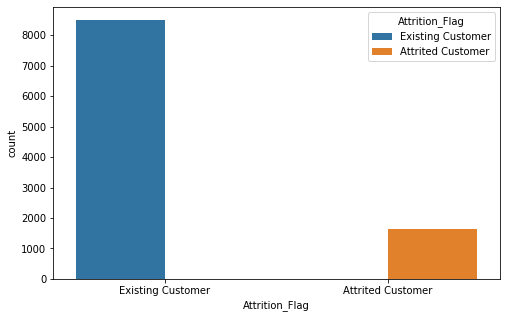

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,930,4428
M,697,4072


F    5358
M    4769
Name: Gender, dtype: int64

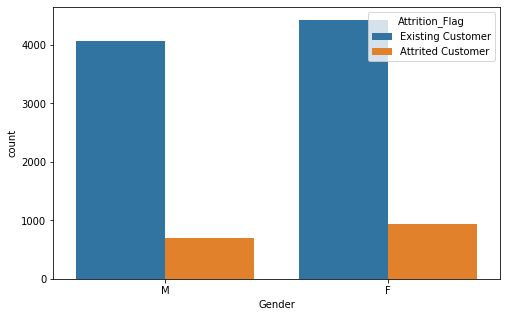

Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,154,859
Doctorate,95,356
Graduate,487,2641
High School,306,1707
Post-Graduate,92,424
Uneducated,237,1250
Unknown,256,1263


Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

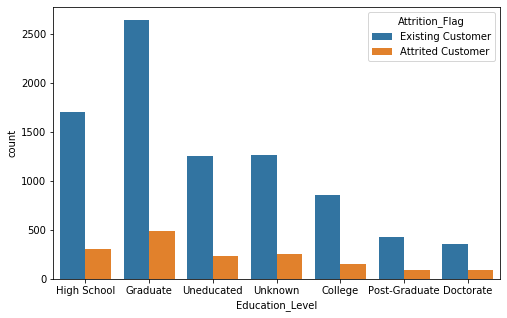

Attrition_Flag,Attrited Customer,Existing Customer
Marital_Status,,
Divorced,121,627
Married,709,3978
Single,668,3275
Unknown,129,620


Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

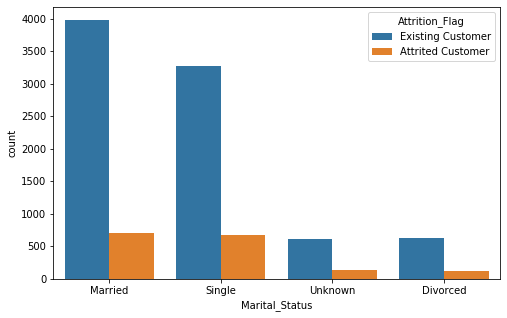

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,126,601
$40K - $60K,271,1519
$60K - $80K,189,1213
$80K - $120K,242,1293
Less than $40K,612,2949
Unknown,187,925


Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

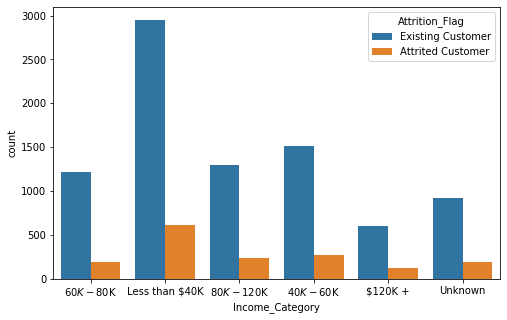

Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,1519,7917
Gold,21,95
Platinum,5,15
Silver,82,473


Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

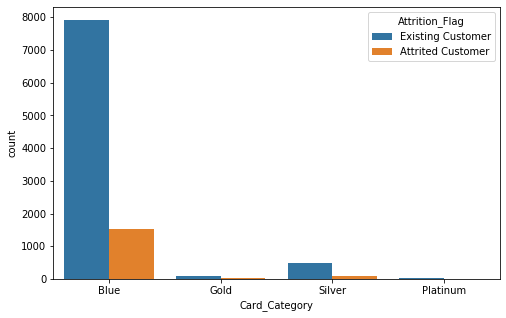

In [108]:
for i in df_cat:
    plt.figure(figsize=(8,5))
    sns.countplot(x=df_cat[i], hue='Attrition_Flag', data=df)
  
    display(pd.crosstab(index=df[i], columns=df['Attrition_Flag']))
    display(df_cat[i].value_counts())
    plt.show();

### Encode Categorical Variables

In [109]:
df_new = pd.get_dummies(df, columns=['Education_Level', 'Marital_Status', 
                                     'Income_Category', 'Card_Category'])

### Encode Binary Columns

In [110]:
df_new.Attrition_Flag.replace(('Attrited Customer', 'Existing Customer'), (1, 0), inplace=True)
df_new.Gender.replace(('M', 'F'), (1, 0), inplace=True)

In [111]:
df_new.head()

,Attrition_Flag,Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Ct,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,1,3,39,5,1,3,777,42,...,0,0,1,0,0,0,1,0,0,0
1,0,49,0,5,44,6,1,2,864,33,...,0,0,0,0,1,0,1,0,0,0
2,0,51,1,3,36,4,1,0,0,20,...,0,0,0,1,0,0,1,0,0,0
3,0,40,0,4,34,3,4,1,2517,20,...,0,0,0,0,1,0,1,0,0,0
4,0,40,1,3,21,5,1,0,0,28,...,0,0,1,0,0,0,1,0,0,0


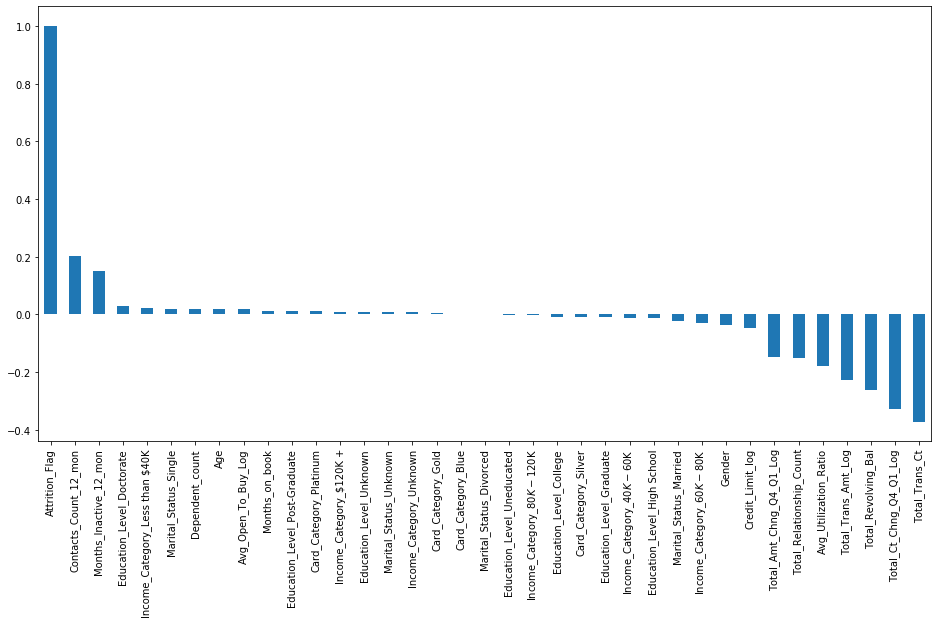

In [112]:
plt.figure(figsize=(16,8))
df_new.corr()['Attrition_Flag'].sort_values(ascending = False).plot(kind='bar')
plt.show()

In [113]:
list(df_new.columns)

['Attrition_Flag',
 'Age',
 'Gender',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Total_Trans_Ct',
 'Avg_Utilization_Ratio',
 'Credit_Limit_log',
 'Avg_Open_To_Buy_Log',
 'Total_Amt_Chng_Q4_Q1_Log',
 'Total_Trans_Amt_Log',
 'Total_Ct_Chng_Q4_Q1_Log',
 'Education_Level_College',
 'Education_Level_Doctorate',
 'Education_Level_Graduate',
 'Education_Level_High School',
 'Education_Level_Post-Graduate',
 'Education_Level_Uneducated',
 'Education_Level_Unknown',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Unknown',
 'Income_Category_$120K +',
 'Income_Category_$40K - $60K',
 'Income_Category_$60K - $80K',
 'Income_Category_$80K - $120K',
 'Income_Category_Less than $40K',
 'Income_Category_Unknown',
 'Card_Category_Blue',
 'Card_Category_Gold',
 'Card_Category_Platinum',
 'Card_Category_Silver']

### Assign Independent and Dependent Variables

In [114]:
X = df_new.drop(['Attrition_Flag'], axis=1).values
y = df_new['Attrition_Flag'].values

### Splitting the dataset into the Training set and Test set

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Feature Scale

In [116]:
# from sklearn.preprocessing import StandardScaler

# Instantiate
# sc = StandardScaler()

# Fit & Transform Train Set
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [117]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate
scaler = MinMaxScaler()

# Fit & Transform Train Set
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [124]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [118]:
# Create a function for many Machine Learning Models
def models(X_train, y_train):
  
  # Using the Logistic Regression Algorithm on the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, y_train)
  
  # Using the K-Nearest Neighbors Algorithm on the Training Set
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, y_train)

  # Using the SVM Algorithm on the Training Set
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, y_train)

  #Using the Kernel SVM Algorithm on the Training Set
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, y_train)

  # Using the Naive Bayes Algorithm on the Training Set
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, y_train)

  #Using the Decision Tree Classifier on the Training Set
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, y_train)

  # Using the Random Forest Classifier on the Training Set
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, y_train)
    
  # Using the XGBoost Classifier on the Training Set
  from xgboost import XGBClassifier
  xgb = XGBClassifier()
  xgb.fit(X_train, y_train)
  
  # Print model accuracy on the training data.
  print('[0] Logistic Regression Training Accuracy:', log.score(X_train, y_train))
  print('[1] K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
  print('[2] Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
  print('[3] Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
  print('[4] Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))
  print('[5] Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
  print('[6] Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
  print('[7] XGBoost Classifier Training Accuracy:', xgb.score(X_train, y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest, xgb

In [119]:
model = models(X_train, y_train)

C:\Users\Raza Saeed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.metrics import confusion_matrix 

for i in range(len(model)):
   cm = confusion_matrix(y_test, model[i].predict(X_test)) 
   # Extracting TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
   print(cm)
   print('Model[{}] Testing Accuracy = "{} "'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print()# Print a new line

### 1. Training Logistic Regression model on the Training Set

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

### Predicting the Test Set results

In [ ]:
y_pred = logreg.predict(X_test)

### Making the confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

### Checking the accuracy

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

### 2. Training Decision Tree Classifier on the Training Set

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

tree.fit(X_train, y_train)

### Predicting the Test Set results

In [ ]:
y_pred2 = tree.predict(X_test)

### Making the Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred2)
print(cm)

### Checking the accuracy

In [ ]:
accuracy_score(y_test, y_pred2)

### 3. Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

classifier.fit(X_train, y_train)

### Predicting the Test Set results

In [ ]:
y_pred3 = classifier.predict(X_test)

### Making the Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred3)
print(cm)

In [ ]:
accuracy_score(y_test, y_pred2)